# GM12878

In [84]:
import pandas as pd
import numpy as np
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)

In [ ]:
# Get the EP chimeric_fragment reads
df = pd.read_csv('GSE190214_GM12878.Enhancer_Promoter.chimeric_fragment.bed', sep='\t', header=None)
# Filter out the enhancer part reads
df = df[[0,1,2,3]].copy()

# df[[4,5]] record the bin region of each reads
df[4] = np.floor((df[1] + df[2]) / 2) - 100
df[5] = np.floor((df[1] + df[2]) / 2) + 100
df[[4,5]] = df[[4,5]].astype(int)

# df[6] record the name of each reads, df[7] record the score of each reads
df[6] = list(range(0, df.shape[0]))
df[7] = 1

# Record the bin of each reads as bed file
df[[0,4,5,6,7,3]].to_csv('GM12878_enhancer_0.bed', sep='\t', header=None, index=None)

# Record the flank bin file of each reads
for i in range(-9, 10):
    if i == 0:
        continue
    df[8] = df.apply(lambda x: x[4] - 200 * i if x[3]=='-' else x[5] + 200 * (i-1), axis=1)
    df[9] = df.apply(lambda x: x[4] - 200 * (i-1) if x[3]=='-' else x[5] + 200 * i, axis=1)
    outfile = f"GM12878_enhancer_{i}.bed"
    df[[0,8,9,6,7,3]].to_csv(outfile, sep='\t', header=None, index=None)

# For each bin file, get the intersection number with transposon
for i in range(-9, 10):
    file = f"GM12878_enhancer_{i}.bed"
    transposon_file = f'hg19.Alu.withpPolyaLength_newMethod2.bed'
    te = 'Alu'
    for s in ['cis', 'trans']:
        outfile = f"GM12878_enhancer_{i}_{te}_intersect_{s}.txt"
        if s == 'cis':
            cmd = f"bedtools intersect -a {file} -b {transposon_file} -u -s > {outfile}"
        else:
            cmd = f"bedtools intersect -a {file} -b {transposon_file} -u -S > {outfile}"
        subprocess.run(cmd, shell=True)

In [ ]:
# Record the te intersected reads ratio of each bin
ratio_dict = dict()
te = 'Alu'
for s in ['cis', 'trans']:
    ratio_dict[s] = dict()
    for i in range(-9, 10):
        file = f"GM12878_enhancer_{i}_{te}_intersect_{s}.txt"
        with open(file, 'r') as infile:
            num = len(infile.readlines())
        all_num = 189693      # all_num is the overall EPI reads number
        ratio = num / all_num
        ratio_dict[s][i] = [ratio]
        
df = pd.DataFrame.from_dict(ratio_dict['cis']).T
fig = sns.lineplot(data=df,  x=df.index, y=df[0], label='RNA reads', linewidth=4)
# plt.xlim((-5, 5))
# plt.ylim((0.03, 0.06))

# MEF

In [7]:
import pandas as pd
import numpy as np
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
# # Get the EP chimeric_fragment reads
# df = pd.read_csv('GSE190214_MEF.Enhancer_Promoter.chimeric_fragment.bed', sep='\t', header=None)
# # Filter out the enhancer part reads
# df = df[[0,1,2,3]].copy()

# # df[[4,5]] record the bin region of each reads
# df[4] = np.floor((df[1] + df[2]) / 2) - 100
# df[5] = np.floor((df[1] + df[2]) / 2) + 100
# df[[4,5]] = df[[4,5]].astype(int)

# # df[6] record the name of each reads, df[7] record the score of each reads
# df[6] = list(range(0, df.shape[0]))
# df[7] = 1

# # Record the bin of each reads as bed file
# df[[0,4,5,6,7,3]].to_csv('MEF_enhancer_0.bed', sep='\t', header=None, index=None)

# # Record the flank bin file of each reads
# for i in range(-9, 10):
#     if i == 0:
#         continue
#     df[8] = df.apply(lambda x: x[4] - 200 * i if x[3]=='-' else x[5] + 200 * (i-1), axis=1)
#     df[9] = df.apply(lambda x: x[4] - 200 * (i-1) if x[3]=='-' else x[5] + 200 * i, axis=1)
#     outfile = f"MEF_enhancer_{i}.bed"
#     df[[0,8,9,6,7,3]].to_csv(outfile, sep='\t', header=None, index=None)

# For each bin file, get the intersection number with transposon
for i in range(-9, 10):
    for te in ['B1', 'B2', 'B4', 'ID', 'MIR']:
        file = f"MEF_enhancer_{i}.bed"
        transposon_file = f'mm9.{te}.bed'
        outfile = f"MEF_enhancer_{i}_{te}_intersect.txt"
        cmd = f"bedtools intersect -a {file} -b {transposon_file} -u -f 0.6 -F 0.6 -e > {outfile}"
        subprocess.run(cmd, shell=True)

In [98]:
ratio_dict = dict()
for te in ['B1', 'B2', 'B4', 'ID', 'MIR']:
    ratio_dict[te] = dict()
    for i in range(-9, 10):
        file = f"MEF_enhancer_{i}_{te}_intersect.txt"
        with open(file, 'r') as infile:
            num = len(infile.readlines())
        all_num = 43271
        ratio = num / all_num
        ratio_dict[te][i] = [ratio]

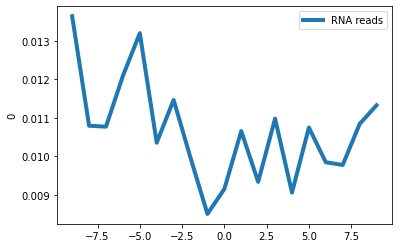

In [105]:
df = pd.DataFrame.from_dict(ratio_dict['MIR']).T
fig = sns.lineplot(data=df,  x=df.index, y=df[0], label='RNA reads', linewidth=4)
# plt.xlim((-5, 5))
# plt.ylim((0.03, 0.06))

In [107]:
df_1 = pd.DataFrame.from_dict(ratio_dict['B1']).T
df_2 = pd.DataFrame.from_dict(ratio_dict['B2']).T
df_3 = pd.DataFrame.from_dict(ratio_dict['B4']).T
df_4 = pd.DataFrame.from_dict(ratio_dict['ID']).T
df_5 = pd.DataFrame.from_dict(ratio_dict['MIR']).T

In [110]:
df_all = df_1 + df_2 + df_3 + df_4 + df_5

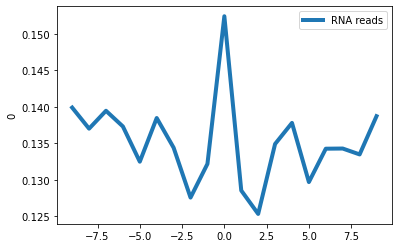

In [112]:
fig = sns.lineplot(data=df_all,  x=df_all.index, y=df_all[0], label='RNA reads', linewidth=4)


# RIC-seq analysis with our method

In [69]:
df = pd.read_csv('GSE190214_EP_and_PP.GM12878.network.csv', skiprows=3)
df = df[df['Interaction type']=='E-P'].copy()

In [51]:
df['e_str'] = df['Enhancer/Promoter genomic region'].str.split(':').str[0]
df['e_start'] = df['Enhancer/Promoter genomic region'].str.split(':').str[1].str.split('-').str[0]
df['e_stop'] = df['Enhancer/Promoter genomic region'].str.split(':').str[1].str.split('-').str[1]

df['p_str'] = df['Promoter genomic region'].str.split(':').str[0]
df['p_start'] = df['Promoter genomic region'].str.split(':').str[1].str.split('-').str[0]
df['p_stop'] = df['Promoter genomic region'].str.split(':').str[1].str.split('-').str[1]

df['strand'] = '.'

df['name'] = df['Enhancer/Promoter ID'].str.cat(df['Promoter ID'], sep=';')

In [54]:
df[['e_str', 'e_start', 'e_stop', 'p_str', 'p_start', 'p_stop', 'name', 'P-value', 'strand', 'strand']].to_csv('EPI_RIC.bedpe', sep='\t', header=None, index=None)

In [73]:
EPI_RIC_overlap_df = pd.read_csv('try.txt', sep='\t', header=None)

In [61]:
EPI_RIC_overlap_df[[0,1,2]].drop_duplicates().to_csv('enhancer_in_EPIfromRIC.bed', sep='\t', header=None, index=None)
cmd = f"bedtools intersect -a enhancer_in_EPIfromRIC.bed -b mm9.sine.bed -f 0.8 -F 0.8 -e -wo > enhancer_in_EPIfromRIC_sine_intersectWo.txt"
subprocess.run(cmd, shell=True)

In [67]:
enhancer_sine_df = pd.read_csv('enhancer_in_EPIfromRIC_sine_intersectWo.txt', sep='\t', header=None)

In [75]:
EPI_RIC_overlap_df.columns = ['e_str', 'e_start', 'e_stop', 'p_str', 'p_start', 'p_stop', 'epi', 'score', 'e_strand', 'p_strand', 
                              'e_RIC_reads_chr', 'e_RIC_reads_start', 'e_RIC_reads_stop', 'p_RIC_reads_chr', 'p_RIC_reads_start', 'p_RIC_reads_stop', 
                              'reads_name', 'reads_socre', 'e_reads_strand', 'p_reads_strand']

In [78]:
enhancer_sine_df.columns = ['e_str', 'e_start', 'e_stop', 'SINE_chr', 'SINE_start', 'SINE_stop', 'SINE_name', 'SINE_socre', 'SINE_strand', 'SINE_family', 'intersection']

In [80]:
EPI_RIC_sine_df = pd.merge(EPI_RIC_overlap_df, enhancer_sine_df, on=['e_str', 'e_start', 'e_stop'], how='inner')

In [88]:
EPI_RIC_sine_df['SINE_median'] = (EPI_RIC_sine_df['SINE_start'] + EPI_RIC_sine_df['SINE_stop']) / 2
EPI_RIC_sine_df['e_RIC_reads_median'] = (EPI_RIC_sine_df['e_RIC_reads_start'] + EPI_RIC_sine_df['e_RIC_reads_stop']) / 2

In [87]:
EPI_RIC_sine_df

,e_str,e_start,e_stop,p_str,p_start,p_stop,epi,score,e_strand,p_strand,e_RIC_reads_chr,e_RIC_reads_start,e_RIC_reads_stop,p_RIC_reads_chr,p_RIC_reads_start,p_RIC_reads_stop,reads_name,reads_socre,e_reads_strand,p_reads_strand,SINE_chr,SINE_start,SINE_stop,SINE_name,SINE_socre,SINE_strand,SINE_family,intersection,SINE_median
0,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3584403,3584509,PB1D10,466,-,SINE/Alu,106,3584456.0
1,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3585640,3585780,B1_Mur1,600,-,SINE/Alu,140,3585710.0
2,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3589816,3589968,B1_Mus1,1026,+,SINE/Alu,152,3589892.0
3,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3591785,3591959,B3,413,-,SINE/B2,174,3591872.0
4,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3592492,3592739,B4,669,+,SINE/B4,247,3592615.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458196,chrX,153939077,153963175,chrX,153765459,153781062,TE24726;MPT13008,0.0,.,.,chrX,153951235,153951307,chrX,153772380,153772458,reads_89425,1,+,+,chrX,153958253,153958440,B2_Mm2,1407,+,SINE/B2,187,153958346.5
3458197,chrX,153939077,153963175,chrX,153765459,153781062,TE24726;MPT13008,0.0,.,.,chrX,153951235,153951307,chrX,153772380,153772458,reads_89425,1,+,+,chrX,153959178,153959362,B2_Mm1t,1519,+,SINE/B2,184,153959270.0
3458198,chrX,153939077,153963175,chrX,153765459,153781062,TE24726;MPT13008,0.0,.,.,chrX,153951235,153951307,chrX,153772380,153772458,reads_89425,1,+,+,chrX,153961324,153961470,B1_Mm,1248,-,SINE/Alu,146,153961397.0
3458199,chrX,153939077,153963175,chrX,153765459,153781062,TE24726;MPT13008,0.0,.,.,chrX,153951235,153951307,chrX,153772380,153772458,reads_89425,1,+,+,chrX,153961662,153961808,B1_Mus2,1299,-,SINE/Alu,146,153961735.0


In [93]:
def getBin(row):
    if row['e_RIC_reads_start'] > row['SINE_start'] and row['e_RIC_reads_stop'] < row['SINE_stop']:
        return 0
    binsize = row['SINE_stop'] - row['SINE_start']
    if row['e_RIC_reads_start'] < row['SINE_start']:
        return np.ceil((row['SINE_median'] - row['e_RIC_reads_median']) / binsize)
    elif row['e_RIC_reads_stop'] > row['SINE_stop']:
        return np.floor((row['SINE_median'] - row['e_RIC_reads_median']) / binsize)

In [94]:
EPI_RIC_sine_df['bin'] = EPI_RIC_sine_df.apply(getBin, axis=1)

In [95]:
EPI_RIC_sine_df

,e_str,e_start,e_stop,p_str,p_start,p_stop,epi,score,e_strand,p_strand,e_RIC_reads_chr,e_RIC_reads_start,e_RIC_reads_stop,p_RIC_reads_chr,p_RIC_reads_start,p_RIC_reads_stop,reads_name,reads_socre,e_reads_strand,p_reads_strand,SINE_chr,SINE_start,SINE_stop,SINE_name,SINE_socre,SINE_strand,SINE_family,intersection,SINE_median,e_RIC_reads_median,bin
0,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3584403,3584509,PB1D10,466,-,SINE/Alu,106,3584456.0,3575544.5,85.0
1,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3585640,3585780,B1_Mur1,600,-,SINE/Alu,140,3585710.0,3575544.5,73.0
2,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3589816,3589968,B1_Mus1,1026,+,SINE/Alu,152,3589892.0,3575544.5,95.0
3,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3591785,3591959,B3,413,-,SINE/B2,174,3591872.0,3575544.5,94.0
4,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3592492,3592739,B4,669,+,SINE/B4,247,3592615.5,3575544.5,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458196,chrX,153939077,153963175,chrX,153765459,153781062,TE24726;MPT13008,0.0,.,.,chrX,153951235,153951307,chrX,153772380,153772458,reads_89425,1,+,+,chrX,153958253,153958440,B2_Mm2,1407,+,SINE/B2,187,153958346.5,153951271.0,38.0
3458197,chrX,153939077,153963175,chrX,153765459,153781062,TE24726;MPT13008,0.0,.,.,chrX,153951235,153951307,chrX,153772380,153772458,reads_89425,1,+,+,chrX,153959178,153959362,B2_Mm1t,1519,+,SINE/B2,184,153959270.0,153951271.0,44.0
3458198,chrX,153939077,153963175,chrX,153765459,153781062,TE24726;MPT13008,0.0,.,.,chrX,153951235,153951307,chrX,153772380,153772458,reads_89425,1,+,+,chrX,153961324,153961470,B1_Mm,1248,-,SINE/Alu,146,153961397.0,153951271.0,70.0
3458199,chrX,153939077,153963175,chrX,153765459,153781062,TE24726;MPT13008,0.0,.,.,chrX,153951235,153951307,chrX,153772380,153772458,reads_89425,1,+,+,chrX,153961662,153961808,B1_Mus2,1299,-,SINE/Alu,146,153961735.0,153951271.0,72.0


In [96]:
EPI_RIC_B1_df = 

,e_str,e_start,e_stop,p_str,p_start,p_stop,epi,score,e_strand,p_strand,e_RIC_reads_chr,e_RIC_reads_start,e_RIC_reads_stop,p_RIC_reads_chr,p_RIC_reads_start,p_RIC_reads_stop,reads_name,reads_socre,e_reads_strand,p_reads_strand,SINE_chr,SINE_start,SINE_stop,SINE_name,SINE_socre,SINE_strand,SINE_family,intersection,SINE_median,e_RIC_reads_median,bin
0,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3584403,3584509,PB1D10,466,-,SINE/Alu,106,3584456.0,3575544.5,85.0
1,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3585640,3585780,B1_Mur1,600,-,SINE/Alu,140,3585710.0,3575544.5,73.0
2,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3589816,3589968,B1_Mus1,1026,+,SINE/Alu,152,3589892.0,3575544.5,95.0
3,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3591785,3591959,B3,413,-,SINE/B2,174,3591872.0,3575544.5,94.0
4,chr1,3575427,3604580,chr19,51009345,51022947,TE46;MPT6581,0.0,.,.,chr1,3575517,3575572,chr19,51016838,51016933,reads_31976,1,+,+,chr1,3592492,3592739,B4,669,+,SINE/B4,247,3592615.5,3575544.5,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458196,chrX,153939077,153963175,chrX,153765459,153781062,TE24726;MPT13008,0.0,.,.,chrX,153951235,153951307,chrX,153772380,153772458,reads_89425,1,+,+,chrX,153958253,153958440,B2_Mm2,1407,+,SINE/B2,187,153958346.5,153951271.0,38.0
3458197,chrX,153939077,153963175,chrX,153765459,153781062,TE24726;MPT13008,0.0,.,.,chrX,153951235,153951307,chrX,153772380,153772458,reads_89425,1,+,+,chrX,153959178,153959362,B2_Mm1t,1519,+,SINE/B2,184,153959270.0,153951271.0,44.0
3458198,chrX,153939077,153963175,chrX,153765459,153781062,TE24726;MPT13008,0.0,.,.,chrX,153951235,153951307,chrX,153772380,153772458,reads_89425,1,+,+,chrX,153961324,153961470,B1_Mm,1248,-,SINE/Alu,146,153961397.0,153951271.0,70.0
3458199,chrX,153939077,153963175,chrX,153765459,153781062,TE24726;MPT13008,0.0,.,.,chrX,153951235,153951307,chrX,153772380,153772458,reads_89425,1,+,+,chrX,153961662,153961808,B1_Mus2,1299,-,SINE/Alu,146,153961735.0,153951271.0,72.0


In [ ]:
bin_reads_dict = ddict(float)
    
for i,j in sine_df[['score_normalized', 'bin']].values:
    bin = j
    bin_reads_dict[bin] += i
    
bin_min = sine_df['bin'].min()
bin_max = sine_df['bin'].max()

for i in range(int(bin_min), int(bin_max)+1):
    bin_reads_dict[i] += 0
    

exp_df = pd.DataFrame({int(k):[v] for k,v in bin_reads_dict.items()}).T

sns.lineplot(data=exp_df,  x=exp_df.index, y=exp_df[0], label='RNA reads', linewidth=4)

plt.xlim(max(-10, bin_min), min(10, bin_max))

# RIC-seq analysis with our method (new)

In [225]:
import pandas as pd
import subprocess
import seaborn as sns
import random
import numpy as np

In [240]:
df = pd.read_csv('GSE190214_MEF.Enhancer_Promoter.chimeric_fragment.bed', sep='\t', header=None)

In [119]:
df[[0,1,2,4,5,6,8,1,3,7]].to_csv('GSE190214_MEF.Enhancer_Promoter.chimeric_fragment.bedpe', sep='\t', header=None, index=None)

In [122]:
cmd = "bedtools sort -i GSE190214_MEF.Enhancer_Promoter.chimeric_fragment.bedpe > GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_sort.bedpe"
subprocess.run(cmd, shell=True)

CompletedProcess(args='bedtools sort -i GSE190214_MEF.Enhancer_Promoter.chimeric_fragment.bedpe > GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_sort.bedpe', returncode=0)

In [241]:
slop_df = df[[0,1,2,8,1,3]].copy()

In [245]:
slop = np.random.randint(2000, 50001, slop_df.shape[0])

In [246]:
slop_df.iloc[:, 1] =slop_df.iloc[:, 1] + slop
slop_df.iloc[:, 2] =slop_df.iloc[:, 2] + slop

In [247]:
slop_df.to_csv('GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer_slop.bed', sep='\t', header=None, index=None)

cmd = "bedtools sort -i GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer_slop.bed > GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer_slop_sort.bed"
subprocess.run(cmd, shell=True)

CompletedProcess(args='bedtools sort -i GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer_slop.bed > GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer_slop_sort.bed', returncode=0)

In [248]:
cmd = "bedtools intersect -a GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer_slop_sort.bed -b mm9.sine.bed -wo -f 0.8 -F 0.8 -e > GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer_slop_sort_mm9_sine_intersectWo.txt"
subprocess.run(cmd, shell=True)

CompletedProcess(args='bedtools intersect -a GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer_slop_sort.bed -b mm9.sine.bed -wo -f 0.8 -F 0.8 -e > GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer_slop_sort_mm9_sine_intersectWo.txt', returncode=0)

In [ ]:
df[[0,1,2,8,1,3]].to_csv('GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer.bed', sep='\t', header=None, index=None)
df[[4,5,6,8,5,7]].to_csv('GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_peomoter.bed', sep='\t', header=None, index=None)
cmd = "bedtools sort -i GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer.bed > GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer_sort.bed"
subprocess.run(cmd, shell=True)
cmd = "bedtools sort -i GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_peomoter.bed > GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_peomoter_sort.bed"
subprocess.run(cmd, shell=True)

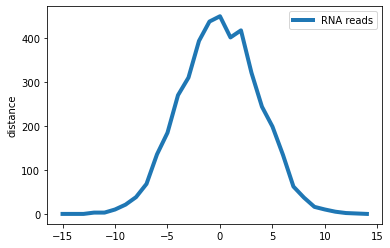

In [251]:
df = pd.read_csv('GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer_slop_sort_mm9_sine_intersectWo.txt', sep='\t', header=None)
df['frag_mean'] = (df[1] + df[2]) / 2
df['te_mean'] = (df[7] + df[8]) / 2
binSize = 10
df[5] = df[5].replace('+', 1)
df[5] = df[5].replace('-', -1)
df['distance'] = (df['frag_mean'] - df['te_mean']) * df[5]
df['distance'] = np.round(df['distance'] / binSize)
control_value_counts_df = df['distance'].value_counts()
control_value_counts_df = pd.DataFrame(value_counts_df)
# fig = sns.lineplot(data=value_counts_df,  x=value_counts_df.index, y=value_counts_df['distance'], label='RNA reads', linewidth=4)

In [255]:
df = pd.read_csv('GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer_sort_mm9_sine_intersectWo.txt', sep='\t', header=None)
df['frag_mean'] = (df[1] + df[2]) / 2
df['te_mean'] = (df[7] + df[8]) / 2
binSize = 10
df[5] = df[5].replace('+', 1)
df[5] = df[5].replace('-', -1)
df['distance'] = (df['frag_mean'] - df['te_mean']) * df[5]
df['distance'] = np.round(df['distance'] / binSize)
value_counts_df = df['distance'].value_counts()
value_counts_df = pd.DataFrame(value_counts_df)
# fig = sns.lineplot(data=value_counts_df,  x=value_counts_df.index, y=value_counts_df['distance'], label='RNA reads', linewidth=4)

In [257]:
value_counts_df

,distance
1.0,448
2.0,439
-2.0,431
3.0,408
0.0,395
-3.0,307
-1.0,287
4.0,275
-4.0,191
5.0,161


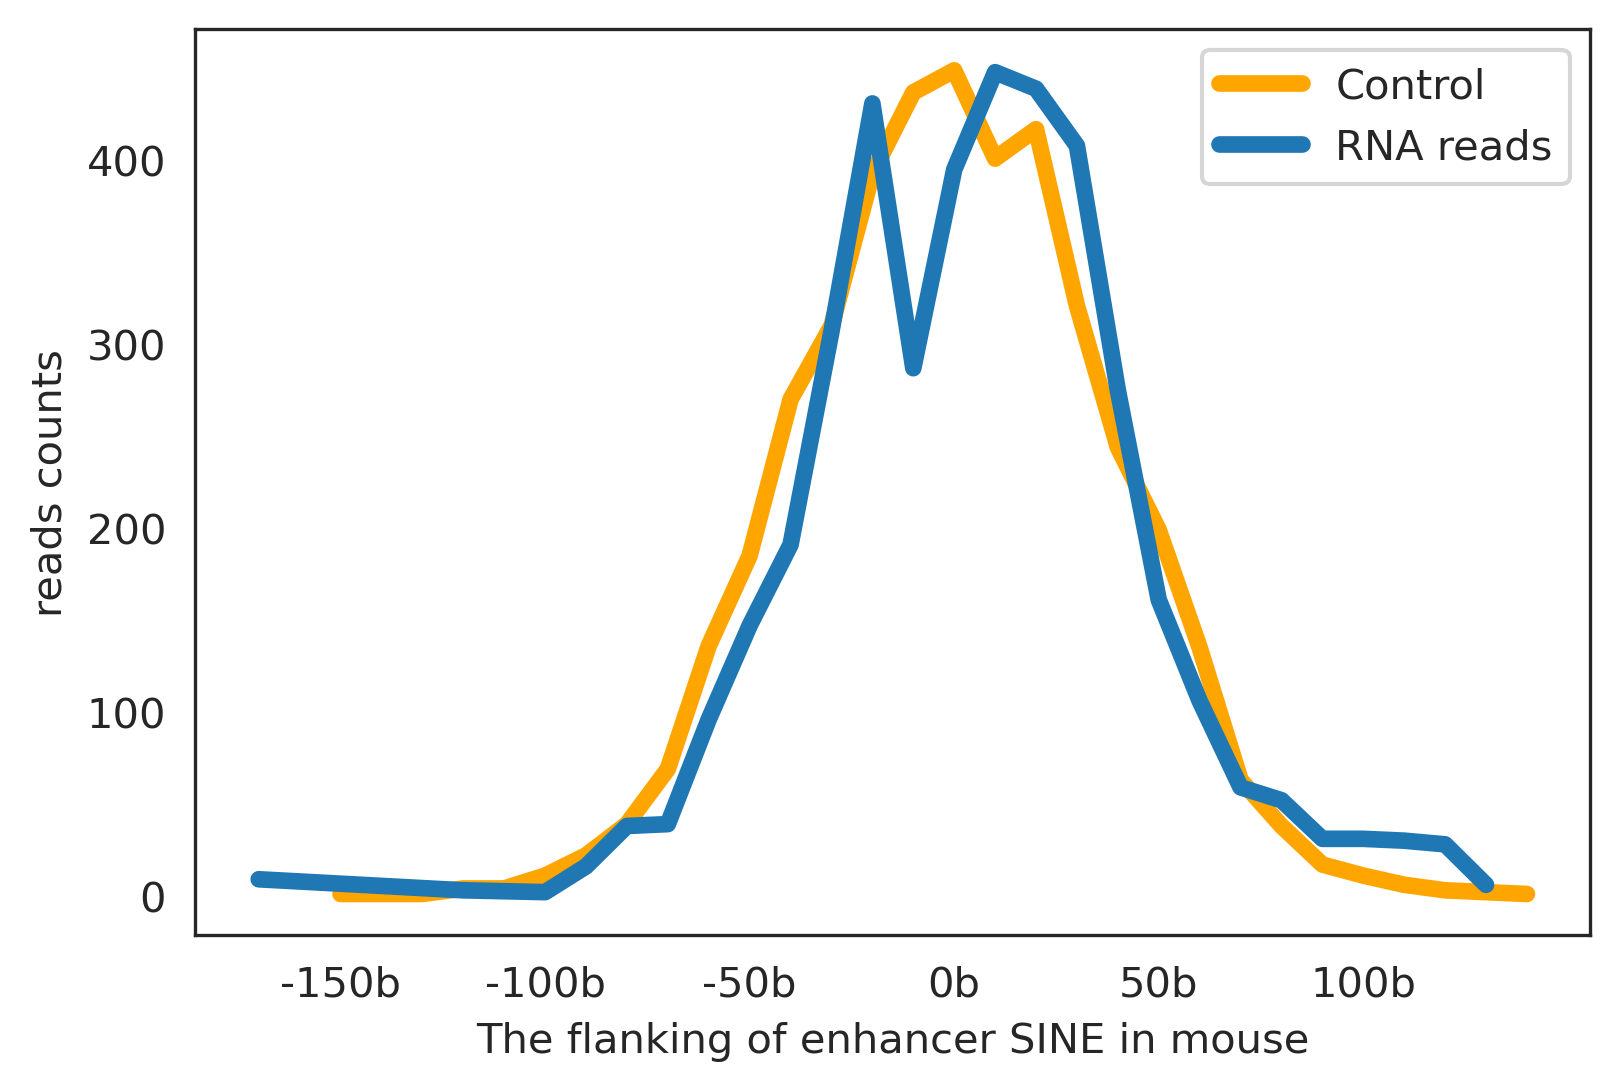

In [266]:
fig1, axes = plt.subplots(1, 1, dpi=300)
sns.set_style("white")

fig = sns.lineplot(data=control_value_counts_df, color = 'orange', x=control_value_counts_df.index, y=control_value_counts_df['distance'], label='Control', linewidth=4)

fig = sns.lineplot(data=value_counts_df,  x=value_counts_df.index, y=value_counts_df['distance'], label='RNA reads', linewidth=4)

plt.ylabel('reads counts')
plt.xlabel('The flanking of enhancer SINE in mouse')

plt.xticks([-15, -10, -5, 0, 5, 10], ['-150b', '-100b', '-50b', '0b', '50b', '100b'])
# plt.yticks([])

plt.savefig('tmp.svg', format='svg')

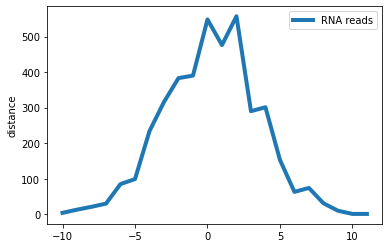

In [193]:
df = pd.read_csv('GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_peomoter_sort_mm9_sine_intersectWo.txt', sep='\t', header=None)
df['frag_mean'] = (df[1] + df[2]) / 2
df['te_mean'] = (df[7] + df[8]) / 2
binSize = 10
df[5] = df[5].replace('+', 1)
df[5] = df[5].replace('-', -1)
df['distance'] = (df['frag_mean'] - df['te_mean']) * df[5]
df['distance'] = np.round(df['distance'] / binSize)
value_counts_df = df['distance'].value_counts()
value_counts_df = pd.DataFrame(value_counts_df)
fig = sns.lineplot(data=value_counts_df,  x=value_counts_df.index, y=value_counts_df['distance'], label='RNA reads', linewidth=4)

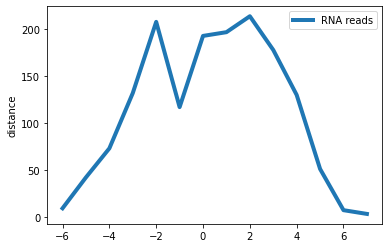

In [201]:
df = pd.read_csv('GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_enhancer_sort_mm9_sine_intersectWo.txt', sep='\t', header=None)
df = df[df[12]=='SINE/Alu']
df['frag_mean'] = (df[1] + df[2]) / 2
df['te_mean'] = (df[7] + df[8]) / 2
binSize = 10
df[5] = df[5].replace('+', 1)
df[5] = df[5].replace('-', -1)
df['distance'] = (df['frag_mean'] - df['te_mean']) * df[5]
df['distance'] = np.round(df['distance'] / binSize)
value_counts_df = df['distance'].value_counts()
value_counts_df = pd.DataFrame(value_counts_df)
fig = sns.lineplot(data=value_counts_df,  x=value_counts_df.index, y=value_counts_df['distance'], label='RNA reads', linewidth=4)

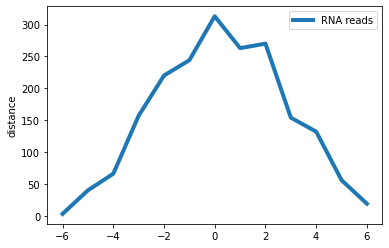

In [202]:
df = pd.read_csv('GSE190214_MEF.Enhancer_Promoter.chimeric_fragment_peomoter_sort_mm9_sine_intersectWo.txt', sep='\t', header=None)
df = df[df[12]=='SINE/Alu']
df['frag_mean'] = (df[1] + df[2]) / 2
df['te_mean'] = (df[7] + df[8]) / 2
binSize = 10
df[5] = df[5].replace('+', 1)
df[5] = df[5].replace('-', -1)
df['distance'] = (df['frag_mean'] - df['te_mean']) * df[5]
df['distance'] = np.round(df['distance'] / binSize)
value_counts_df = df['distance'].value_counts()
value_counts_df = pd.DataFrame(value_counts_df)
fig = sns.lineplot(data=value_counts_df,  x=value_counts_df.index, y=value_counts_df['distance'], label='RNA reads', linewidth=4)